In [1]:
import numpy as np
_ = np.seterr(all='raise')

In [2]:
def f(x):
    m = 1
    a = 1
    U = 1
    h = 1
    try:
        return 1/np.tan(np.sqrt(2*m*(a**2)*U*(1-x)/(h**2))) - np.sqrt(1/x - 1)
    except FloatingPointError as e:
        print(e, "x =", x)

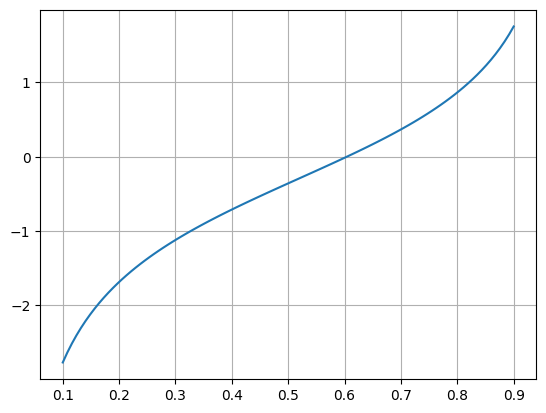

In [3]:
import matplotlib.pyplot as plt
a = 0.1
b = 0.9
x = np.linspace(a, b, 100)
y = [f(xi) for xi in x]
plt.grid(True)
plt.plot(x, y)

In [4]:
def dichotomy_simple(f, a, b, e = 0.001):
    i = 1
    while b - a > e:
        if f(a) * f((a + b) / 2) <= 0:
            b = (a + b) / 2
        else:
            a = (a + b) / 2
        i += 1
    return a, b, i


def dichotomy_efficient(f, a, b, e = 0.001):
    i = 1
    f_a = f(a)
    while b - a > e:
        m = (a + b) / 2
        f_m = f(m)
        if f_a * f_m <= 0:
            b = m
        else:
            a = m
            f_a = f_m
        i += 1
    return a, b, i

In [5]:
print(*dichotomy_simple(f, a, b))
print(*dichotomy_efficient(f, a, b))

0.6031249999999999 0.6039062499999999 11
0.6031249999999999 0.6039062499999999 11


In [9]:
import time
time_simple = 0
time_efficient = 0
N = 10000
for i in range(N):
    now = time.time()
    a1, b1, i1 = dichotomy_simple(f, a, b, 0.00000001)
    time_simple += time.time() - now

    now = time.time()
    a2, b2, i2 = dichotomy_efficient(f, a, b, 0.00000001)
    time_efficient += time.time() - now

print("simple", time_simple / N)
print("efficient", time_efficient / N)
print("time_efficient / time_simple", time_efficient / time_simple)

simple 0.00014923374652862548
efficient 8.033008575439454e-05
time_efficient / time_simple 0.5382836497975738


(-0.31676222183611114, 6)


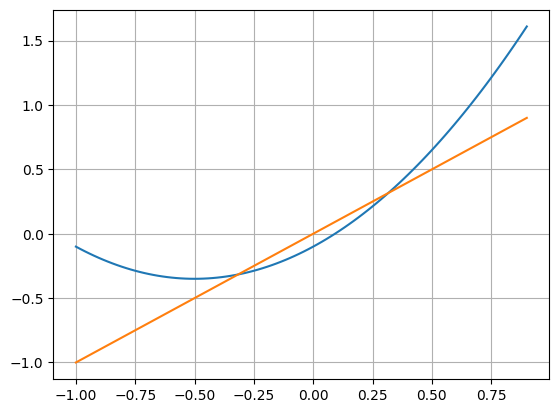

In [55]:
def phi(x):
        #return f(x) + x
        return x**2 - 0.1 + x
a = -1
b = 0.9
x = np.linspace(a, b, 100)
y = [phi(xi) for xi in x]
plt.grid(True)
plt.plot(x, y)
plt.plot(x, x)  
    
def simple_iterations(phi, x0, e = 0.001):
    i = 1
    while True:
        x = phi(x0)
        prev_x = x0
        x0 = x
        i += 1
        if np.abs(x - prev_x) < e:
            break
    return x0, i

print(simple_iterations(phi, -0.5))
    

    